In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import math
import statistics
import scipy.stats
import statsmodels.api as sm


%matplotlib inline
sns.set(style='white', context='notebook', palette='deep') 
import matplotlib.style as style
style.use('fivethirtyeight')

In [2]:
df = pd.read_csv('nyc-rolling-sales.csv')

In [3]:
df.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [4]:
df.shape

(84548, 22)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Unnamed: 0                      84548 non-null  int64 
 1   BOROUGH                         84548 non-null  int64 
 2   NEIGHBORHOOD                    84548 non-null  object
 3   BUILDING CLASS CATEGORY         84548 non-null  object
 4   TAX CLASS AT PRESENT            84548 non-null  object
 5   BLOCK                           84548 non-null  int64 
 6   LOT                             84548 non-null  int64 
 7   EASE-MENT                       84548 non-null  object
 8   BUILDING CLASS AT PRESENT       84548 non-null  object
 9   ADDRESS                         84548 non-null  object
 10  APARTMENT NUMBER                84548 non-null  object
 11  ZIP CODE                        84548 non-null  int64 
 12  RESIDENTIAL UNITS               84548 non-null

In [6]:
df.drop(['Unnamed: 0','EASE-MENT'], axis=1, inplace=True)

In [7]:
df['BOROUGH'] = df.BOROUGH.replace({1:'Manhattan', 2:'Bronx', 3:'Brooklyn', 4:'Queens', 5:'Staten Island'})

In [8]:
df['SALE YEAR'] = pd.DatetimeIndex(df['SALE DATE']).year
df['SALE MONTH'] = pd.DatetimeIndex(df['SALE DATE']).month_name()

In [9]:
df['SALE DATE'] = pd.to_datetime(df['SALE DATE'], errors='coerce')
df['SALE PRICE'] = pd.to_numeric(df['SALE PRICE'], errors='coerce')
df['LAND SQUARE FEET'] = pd.to_numeric(df['LAND SQUARE FEET'], errors='coerce')
df['GROSS SQUARE FEET']= pd.to_numeric(df['GROSS SQUARE FEET'], errors='coerce')
df['TAX CLASS AT TIME OF SALE'] = df['TAX CLASS AT TIME OF SALE'].astype('category')
df['TAX CLASS AT PRESENT'] = df['TAX CLASS AT PRESENT'].astype('category')
df['BOROUGH'] = df['BOROUGH'].astype('category')

In [10]:
sum(df.duplicated(df.columns))

765

In [11]:
df = df.drop_duplicates(df.columns, keep='last')
sum(df.duplicated(df.columns))

0

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83783 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         83783 non-null  category      
 1   NEIGHBORHOOD                    83783 non-null  object        
 2   BUILDING CLASS CATEGORY         83783 non-null  object        
 3   TAX CLASS AT PRESENT            83783 non-null  category      
 4   BLOCK                           83783 non-null  int64         
 5   LOT                             83783 non-null  int64         
 6   BUILDING CLASS AT PRESENT       83783 non-null  object        
 7   ADDRESS                         83783 non-null  object        
 8   APARTMENT NUMBER                83783 non-null  object        
 9   ZIP CODE                        83783 non-null  int64         
 10  RESIDENTIAL UNITS               83783 non-null  int64         
 11  CO

In [13]:
df.columns[df.isnull().any()]

Index(['LAND SQUARE FEET', 'GROSS SQUARE FEET', 'SALE PRICE'], dtype='object')

In [14]:
df['LAND SQUARE FEET']=df['LAND SQUARE FEET'].fillna(df['LAND SQUARE FEET'].mean())
df['GROSS SQUARE FEET']=df['GROSS SQUARE FEET'].fillna(df['GROSS SQUARE FEET'].mean())

In [19]:
data = df[df['SALE PRICE'].notnull()]

In [20]:
print(data.shape)data.head(10)

SyntaxError: invalid syntax (3788702553.py, line 1)

Text(0.5, 1.0, 'Correlation Heatmap')

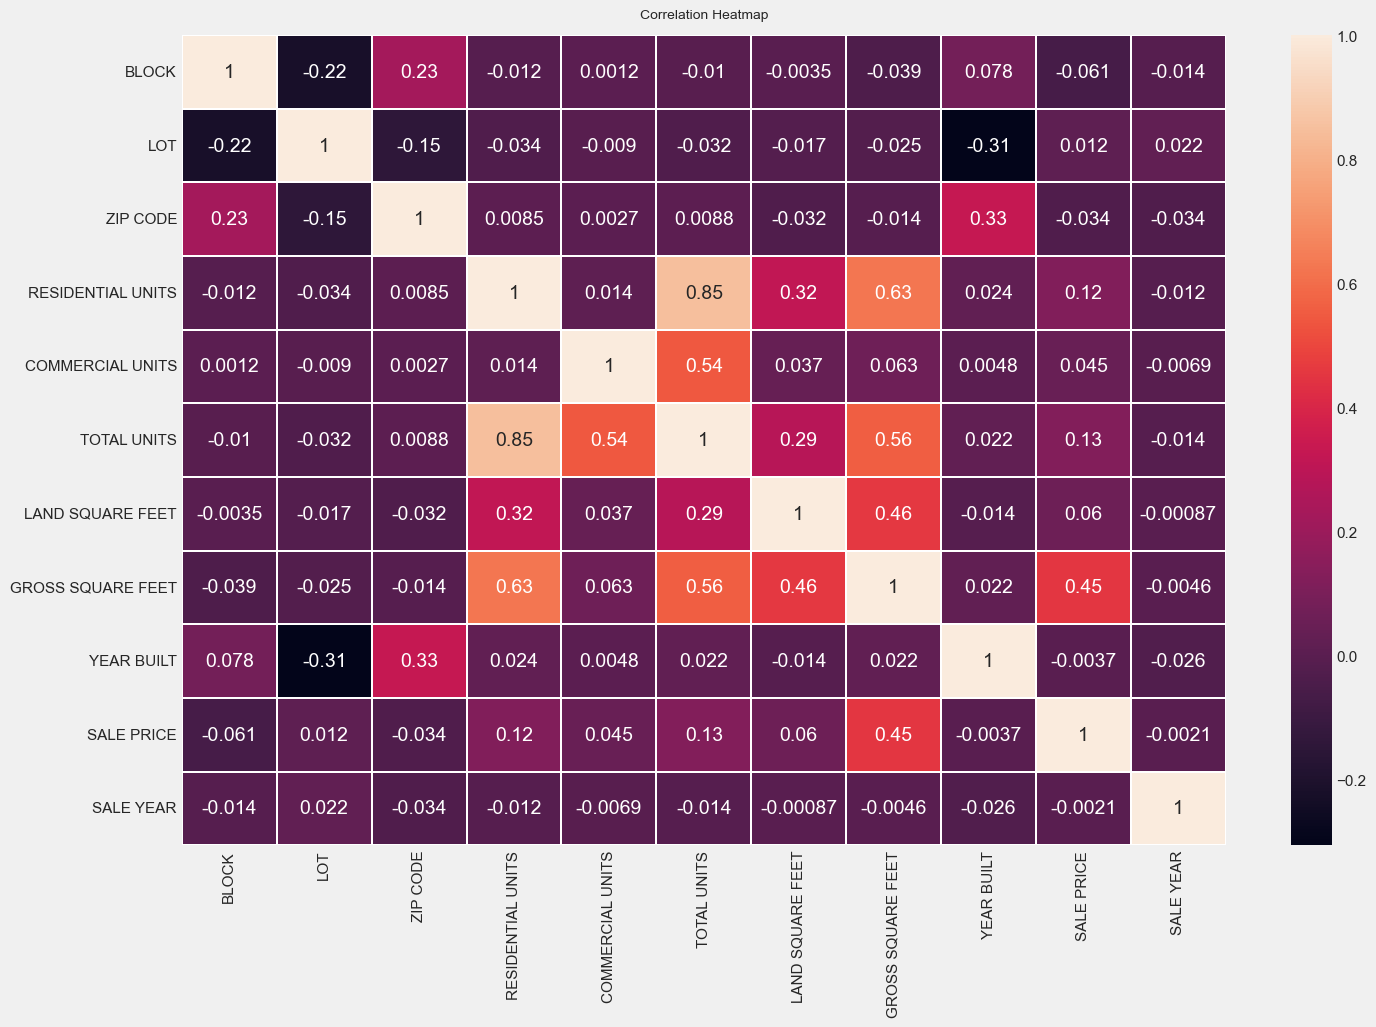

In [21]:
corr = data.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr, linewidth=0.3, annot=True,)
ax.set_title('Correlation Heatmap', fontdict={'fontsize':10}, pad=12)

In [22]:
data.describe()

,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE,SALE YEAR
count,69607.000000,69607.000000,69607.000000,69607.000000,69607.000000,69607.000000,6.960700e+04,6.960700e+04,69607.000000,6.960700e+04,69607.000000
mean,4199.890140,374.580473,10741.159323,1.875070,0.164121,2.059319,3.638934e+03,3.642753e+03,1799.852184,1.280703e+06,2016.655293
std,3431.897518,656.232024,1264.804508,14.291398,8.997236,16.992716,3.315376e+04,2.422798e+04,520.099311,1.143036e+07,0.475276
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,2016.000000
25%,1350.000000,22.000000,10306.000000,0.000000,0.000000,0.000000,1.900000e+03,1.266000e+03,1920.000000,2.300000e+05,2016.000000
50%,3378.000000,50.000000,11209.000000,1.000000,0.000000,1.000000,2.945000e+03,2.400000e+03,1938.000000,5.330000e+05,2017.000000
75%,6192.000000,820.000000,11249.000000,2.000000,0.000000,2.000000,3.854481e+03,3.894416e+03,1965.000000,9.500000e+05,2017.000000
max,16319.000000,9106.000000,11694.000000,1844.000000,2261.000000,2261.000000,4.252327e+06,3.750565e+06,2017.000000,2.210000e+09,2017.000000


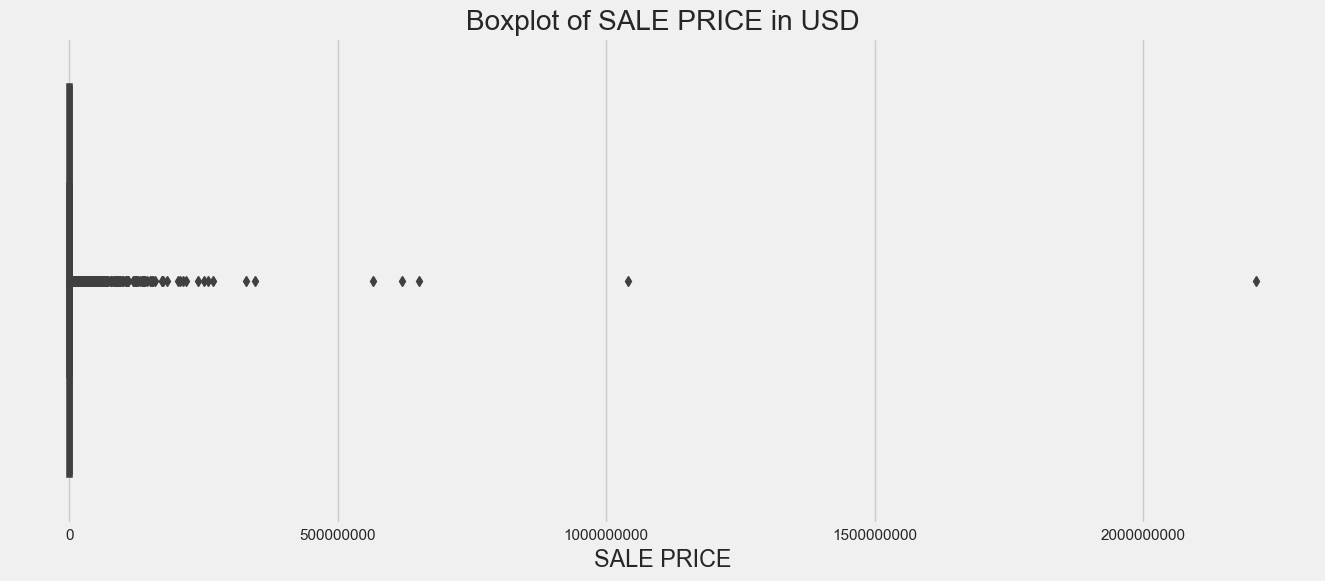

In [23]:
plt.figure(figsize=(15,6))

sns.boxplot(x='SALE PRICE', data=data)
plt.ticklabel_format(style='plain', axis='x')
plt.title('Boxplot of SALE PRICE in USD')
plt.show()

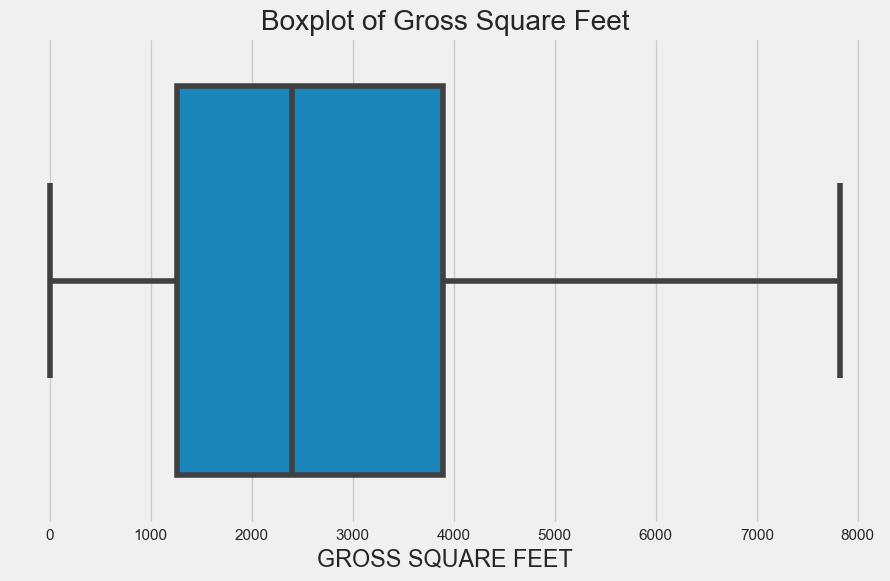

In [24]:
plt.figure(figsize=(10,6))
sns.boxplot(x='GROSS SQUARE FEET', data=data, showfliers=False)
plt.ticklabel_format(style='plain', axis='x')
plt.title('Boxplot of Gross Square Feet')
plt.show()

Text(0.5, 1.0, 'Boxplot of Land Square Feet')

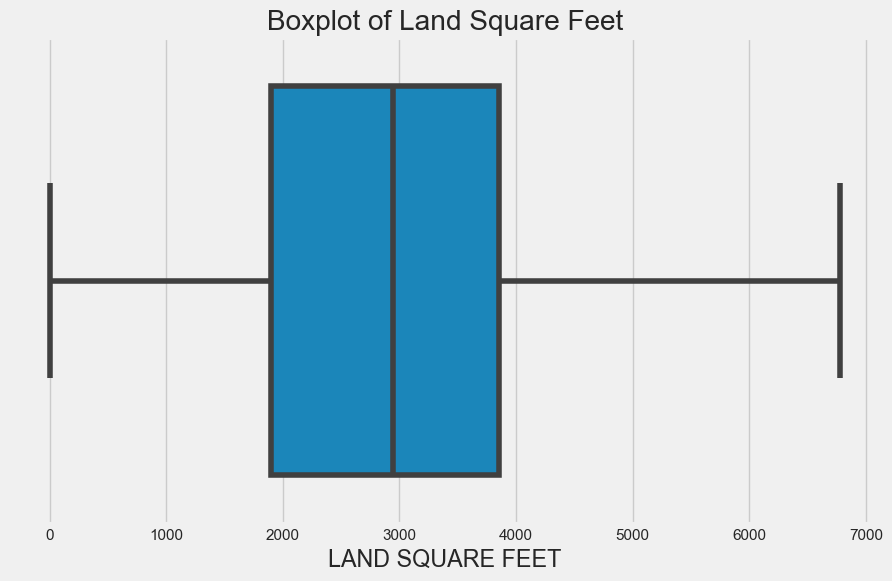

In [25]:
plt.figure(figsize=(10,6))
sns.boxplot(x='LAND SQUARE FEET', data=data,showfliers=False)
plt.ticklabel_format(style='plain', axis='x')
plt.title('Boxplot of Land Square Feet')

In [26]:
data = data[data['GROSS SQUARE FEET'] < 10000]
data = data[data['LAND SQUARE FEET'] < 10000]

In [27]:
data.shape

(67563, 22)

In [28]:
SalePrice_mean = np.mean(data['SALE PRICE'], axis=0)
LandSqrFeet_mean = np.mean(data["LAND SQUARE FEET"], axis=0)
GrossSqrFeet_mean = np.mean(data["GROSS SQUARE FEET"], axis=0)

print("Mean of Sale Price:", SalePrice_mean)
print("Mean of Land Square Feet:", LandSqrFeet_mean)
print("Mean of Gross Square Feet:", GrossSqrFeet_mean)

Mean of Sale Price: 946763.8596569129
Mean of Land Square Feet: 2719.8356477205234
Mean of Gross Square Feet: 2405.7598713054076


In [29]:
df_mean1 = data.groupby(["SALE YEAR", "SALE MONTH"])[['TOTAL UNITS', 'SALE PRICE']].mean()
df_mean1

TOTAL UNITS    SALE PRICE
SALE YEAR SALE MONTH                           
2016      December       1.418451  9.494030e+05
          November       1.323471  8.529589e+05
          October        1.716938  8.672530e+05
          September      1.320104  9.323035e+05
2017      April          1.284418  9.488053e+05
          August         1.127637  1.029399e+06
          February       1.322498  8.854464e+05
          January        1.276483  9.798324e+05
          July           1.221115  9.691051e+05
          June           1.267966  1.029124e+06
          March          1.297664  9.573256e+05
          May            1.256397  9.470762e+05

In [30]:
df_mean2 = data.groupby(["BOROUGH"])[['TOTAL UNITS', 'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'SALE PRICE']].mean()
df_mean2.sort_values(["SALE PRICE"], ascending=False, inplace=True)
df_mean2

,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,SALE PRICE
BOROUGH,,,,
Manhattan,0.685720,3776.299759,3944.432255,2.361377e+06
Brooklyn,1.710378,1504.881790,1573.451730,6.542181e+05
Queens,1.234850,3413.427187,2671.218734,6.028922e+05
Staten Island,1.242684,3570.891151,2031.243629,4.683261e+05
Bronx,1.596784,2107.310720,1660.901378,3.317502e+05


In [31]:
SalePrice_median = statistics.median(data['SALE PRICE'])
LandSqrFeet_median = statistics.median(data["LAND SQUARE FEET"])
GrossSqrFeet_median = statistics.median(data["GROSS SQUARE FEET"])

print("Median of Sale Price:", SalePrice_median)
print("Median of Land Square Feet:", LandSqrFeet_median)
print("Median of Gross Square Feet:", GrossSqrFeet_median)

Median of Sale Price: 525500.0
Median of Land Square Feet: 2800.0
Median of Gross Square Feet: 2323.0


In [32]:
df_median1 = data.groupby(["SALE YEAR", "SALE MONTH"])[['TOTAL UNITS', 'SALE PRICE']].median()
df_median1

TOTAL UNITS  SALE PRICE
SALE YEAR SALE MONTH                         
2016      December            1.0    497500.0
          November            1.0    480000.0
          October             1.0    494500.0
          September           1.0    492000.0
2017      April               1.0    510000.0
          August              1.0    630000.0
          February            1.0    500000.0
          January             1.0    525000.0
          July                1.0    587500.0
          June                1.0    573000.0
          March               1.0    500000.0
          May                 1.0    540000.0

In [33]:
df_median2 = data.groupby(["BOROUGH"])[['TOTAL UNITS', 'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'SALE PRICE']].median()
df_median2.sort_values(["SALE PRICE"], ascending=False, inplace=True)
df_median2

,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,SALE PRICE
BOROUGH,,,,
Manhattan,0.0,3854.481179,3894.415813,1125000.0
Queens,1.0,3854.481179,2450.000000,490000.0
Staten Island,1.0,3750.000000,1686.000000,455000.0
Brooklyn,1.0,1800.000000,1472.000000,426000.0
Bronx,1.0,2264.500000,1674.000000,270000.0


In [34]:
pd.DataFrame(data).mode()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,...,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,SALE YEAR,SALE MONTH
0,Brooklyn,FLUSHING-NORTH,01 ONE FAMILY DWELLINGS,1,5066,1,D4,131-05 40TH ROAD,,11235,...,1,3854.481179,3894.415813,0,1,D4,0.0,2016-12-22,2017,June


In [35]:
SalePrice_range = np.ptp(data['SALE PRICE'])
LandSqrFeet_range = np.ptp(data["LAND SQUARE FEET"])
GrossSqrFeet_range = np.ptp(data["GROSS SQUARE FEET"])

print("Range of Sale Price:", SalePrice_range)
print("Range of Land Square Feet:", LandSqrFeet_range)
print("Range of Gross Square Feet:", GrossSqrFeet_range)

Range of Sale Price: 250867763.0
Range of Land Square Feet: 9996.0
Range of Gross Square Feet: 9992.0


In [36]:
SalePrice_var = statistics.variance(data['SALE PRICE'])
LandSqrFeet_var = statistics.variance(data["LAND SQUARE FEET"])
GrossSqrFeet_var = statistics.variance(data["GROSS SQUARE FEET"])

print("variance of Sale Price:", SalePrice_var)
print("variance of Land Square Feet:", LandSqrFeet_var)
print("variance of Gross Square Feet:", GrossSqrFeet_var)

variance of Sale Price: 7431991954322.694
variance of Land Square Feet: 2530671.6620020955
variance of Gross Square Feet: 2533582.9070252576


In [37]:
df_var1 = data.groupby(["SALE YEAR", "SALE MONTH"])[['TOTAL UNITS', 'SALE PRICE']].var()
df_var1

TOTAL UNITS    SALE PRICE
SALE YEAR SALE MONTH                           
2016      December      15.104581  1.235845e+13
          November       1.958682  5.271885e+12
          October      969.493482  5.059937e+12
          September      2.287951  7.617701e+12
2017      April          1.756139  5.581804e+12
          August         2.123488  8.262742e+12
          February       2.172034  3.280333e+12
          January        1.830151  5.504605e+12
          July           2.057270  2.783086e+12
          June           2.178035  1.276594e+13
          March          1.746868  1.361858e+13
          May            2.067906  4.216271e+12

In [38]:
df_var2 = data.groupby(["BOROUGH"])[['TOTAL UNITS', 'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'SALE PRICE']].var()
df_var2.sort_values(["SALE PRICE"], ascending=False, inplace=True)
df_var2

,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,SALE PRICE
BOROUGH,,,,
Manhattan,2.553650,1.722458e+05,2.674397e+05,2.814456e+13
Queens,282.736008,1.205745e+06,1.526011e+06,2.025387e+12
Brooklyn,5.765288,2.003268e+06,2.740420e+06,1.394897e+12
Bronx,2.352785,2.910968e+06,2.303243e+06,4.870188e+11
Staten Island,0.437589,2.808522e+06,1.093547e+06,1.013164e+11


In [39]:
SalePrice_std = np.std(data['SALE PRICE'])
LandSqrFeet_std = np.std(data["LAND SQUARE FEET"])
GrossSqrFeet_std = np.std(data["GROSS SQUARE FEET"])

print("Standard Deviation of Sale Price:", SalePrice_std)
print("Standard Deviation of Land Square Feet:", LandSqrFeet_std)
print("Standard Deviation of Gross Square Feet:", GrossSqrFeet_std)

Standard Deviation of Sale Price: 2726147.823102385
Standard Deviation of Land Square Feet: 1590.796720366595
Standard Deviation of Gross Square Feet: 1591.7114711724541


In [40]:
df_std1 = data.groupby(["SALE YEAR", "SALE MONTH"])[['TOTAL UNITS', 'SALE PRICE']].std()
df_std1

TOTAL UNITS    SALE PRICE
SALE YEAR SALE MONTH                           
2016      December       3.886461  3.515458e+06
          November       1.399529  2.296059e+06
          October       31.136690  2.249430e+06
          September      1.512597  2.760018e+06
2017      April          1.325194  2.362584e+06
          August         1.457219  2.874499e+06
          February       1.473782  1.811169e+06
          January        1.352831  2.346189e+06
          July           1.434319  1.668258e+06
          June           1.475817  3.572946e+06
          March          1.321691  3.690337e+06
          May            1.438022  2.053356e+06

In [41]:
df_std2 = data.groupby(["BOROUGH"])[['TOTAL UNITS', 'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'SALE PRICE']].std()
df_std2.sort_values(["SALE PRICE"], ascending=False, inplace=True)
df_std2

,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,SALE PRICE
BOROUGH,,,,
Manhattan,1.598014,415.025045,517.145720,5.305145e+06
Queens,16.814756,1098.064277,1235.318216,1.423161e+06
Brooklyn,2.401101,1415.368340,1655.421429,1.181058e+06
Bronx,1.533879,1706.155789,1517.644002,6.978673e+05
Staten Island,0.661505,1675.864502,1045.728027,3.183023e+05


C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SALE PRICE', ylabel='Density'>

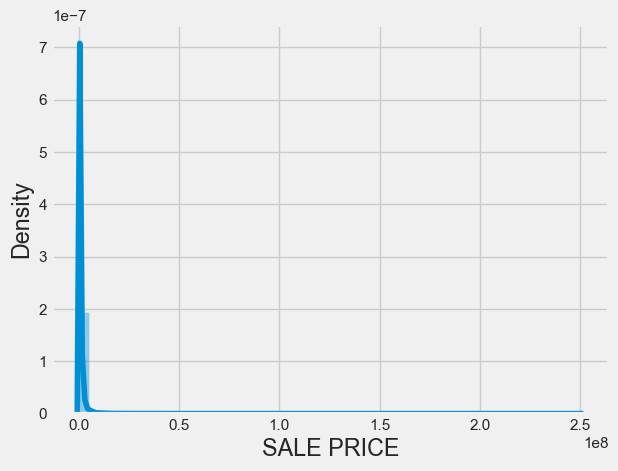

In [42]:
sns.distplot(data['SALE PRICE'])

In [43]:
data['SALE PRICE'].skew()

33.71827754831459

nan


OverflowError: cannot convert float infinity to integer

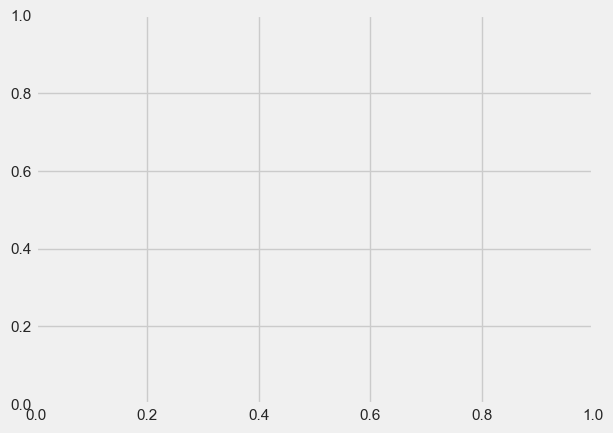

In [51]:
sp_normal =np.log(data['SALE PRICE'])
print(sp_normal.skew())
sns.distplot(sp_normal,
             kde=True,
             color='navy')

In [52]:
CI_Borough = data.groupby(["BOROUGH"]).agg({"SALE PRICE": [np.mean, np.std, np.size]})
CI_Borough

SALE PRICE                     
                       mean           std   size
BOROUGH                                         
Bronx          3.317502e+05  6.978673e+05   6530
Brooklyn       6.542181e+05  1.181058e+06  23213
Manhattan      2.361377e+06  5.305145e+06  13978
Queens         6.028922e+05  1.423161e+06  18135
Staten Island  4.683261e+05  3.183023e+05   5707

In [53]:
mean_queens = 6.021809e+05
std_queens = 4.256398e+05
n = 17349
z = 1.96 

In [54]:
se = std_queens/ np.sqrt(n)

lcb = mean_queens - z * se
ucb = mean_queens + z * se

print("Confidence Interval: ", lcb, 'and' , ucb)

Confidence Interval:  595847.1476519895 and 608514.6523480106


In [55]:
CI_bcc = data.groupby(["BUILDING CLASS CATEGORY", "BOROUGH"]).agg({"SALE PRICE": [np.mean, np.std, np.size]})
CI_bcc.head()

SALE PRICE  \
                                                                   mean   
BUILDING CLASS CATEGORY                     BOROUGH                       
01 ONE FAMILY DWELLINGS                     Bronx          3.241056e+05   
                                            Brooklyn       5.990920e+05   
                                            Manhattan      8.061651e+06   
                                            Queens         5.938405e+05   
                                            Staten Island  4.658297e+05   

                                                                         \
                                                                    std   
BUILDING CLASS CATEGORY                     BOROUGH                       
01 ONE FAMILY DWELLINGS                     Bronx          4.130245e+05   
                                            Brooklyn       8.391921e+05   
                                            Manhattan      7.388416e+06   
                                            Queens         3.189919e+05   
                                            Staten Island  2.761249e+05   

                                                                   
                                                             size  
BUILDING CLASS CATEGORY                     BOROUGH                
01 ONE FAMILY DWELLINGS                     Bronx          1329.0  
                                            Brooklyn       3466.0  
                                            Manhattan        78.0  
                                            Queens         5883.0  
                                            Staten Island  3430.0

In [56]:
mean_01 = 6.159284e+05
std_01 = 3.039587e+05
n = 5666
z = 1.96 

In [57]:
se = std_01/ np.sqrt(n)

lcb = mean_01 - z * se
ucb = mean_01 + z * se

print("Confidence Interval: ", lcb, 'and' , ucb)

Confidence Interval:  608013.7381482649 and 623843.0618517351


## Hypothesis Testing
    - Difference Of Means
Apakah terdapat perbedaan harga jual pada properti yang dibangun ditahun 1900an dan tahun 2000an?

Significance level (alpha) : 5% (0.05)

Hipotesis :

H0: μ1 = μ2 (tidak terdapat perbedaan rata-rata  harga jual pada properti yang dibangun ditahun 1900an dan 2000an)

H1: μ1 ≠ μ2 (terdapat perbedaan rata-rata harga jual pada properti yang dibangun di tahun 1900an dan tahun 2000an)

In [58]:
yb_sp = data[['YEAR BUILT', 'SALE PRICE']]
yb_sp.head(20)

,YEAR BUILT,SALE PRICE
0,1900,6625000.0
3,1913,3936272.0
4,1900,8000000.0
6,1920,3192840.0
12,1920,1.0
13,1920,499000.0
14,1920,10.0
15,1920,529500.0
16,1920,423000.0
17,1925,501000.0


In [59]:
yb_90s= yb_sp[(yb_sp["YEAR BUILT"] >= 1900) & (yb_sp["YEAR BUILT"] < 2000)]
yb_90s.head()

,YEAR BUILT,SALE PRICE
0,1900,6625000.0
3,1913,3936272.0
4,1900,8000000.0
6,1920,3192840.0
12,1920,1.0


In [60]:
yb_00s = yb_sp[yb_sp["YEAR BUILT"] >= 2000]
yb_00s.head()

,YEAR BUILT,SALE PRICE
95,2014,701341.0
100,2014,753421.0
104,2014,771980.0
112,2014,1247356.0
116,2005,2150000.0


In [61]:
n90s = len(yb_90s)
n00s = len(yb_00s)

mean_90s = yb_90s["SALE PRICE"].mean()
mean_00s = yb_00s["SALE PRICE"].mean()

std_90s = yb_90s["SALE PRICE"].std()
std_00s = yb_00s["SALE PRICE"].std()

print(n90s, mean_90s, std_90s,'\n',n00s, mean_00s, std_00s)

50604 803439.6426764682 2164730.728251878 
 9861 1503087.4290639895 3433134.7323884326


In [62]:
sm.stats.ztest(yb_90s['SALE PRICE'], yb_00s['SALE PRICE'], alternative='two-sided')

(-26.29221211732447, 2.35424385867561e-152)

Berdasarkan data di atas, diketahui p-value adalah 0.0 yang mana nilainya lebih kecil dari alpha (0.0 < 0.05). Maka dari itu, H0 ditolak dan H1 diterima, sehingga dapat disimpulkan bahwa ada cukup bukti untuk mengatakan bahwa terdapat perbedaan rata-rata harga jual pada properti yang dibangun di tahun 1900an dan tahun 2000an

## Kesimpulan

- Data yang digunakan untuk perhitungan statistik di tugas ini didapati dari hasil data cleaning dan inspection yang mana berjumlah 53856. Data ini pada awalnya berjumlah 84548 
- Dari kelima Borough, yang memiliki harga jual dengan rata-rata dan nilai tengah yang tertinggi adalah Manhattan
- Sale Price berdistribusi gamma dan kurvanya memiliki kemencengan positif, sehingga, untuk mengubah kurva tsb menjadi simetris, maka digunakan log transformation
- Confidence Interval untuk rata-rata harga jual properti di daerah Queens berada di interval 595847.1476519895 dan 608514.6523480106 USD
- Confidence Interval untuk rata-rata harga jual kategori kelas bangunan One Family Dwellings di Queens berada di interval 608013.7381482649 dan 623843.0618517351 USD
- Berdasarkan hypothesis testing untuk menentukan apakah ada perbedaan rata-rata harga jual pada properti yang dibangun di tahun 1900an dan tahun 2000an, dapat diketahui p-value (0.0) kurang dari alpha (0.05). Dengan begitu, dapat dikatakan bahwa terdapat perbedaan rata-rata harga jual pada properti yang dibangun di tahun 1900an dan tahun 2000an